<a href="https://colab.research.google.com/github/vanecornejo/EDP-II/blob/main/M%C3%A9todo%20de%20Colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 5.1 - Método de Colocación**

Queremos resolver el problema:

$$ u'' + u = x,\qquad u(0)=0,\quad u'(0)=2 $$

Buscamos una solución aproximada cúbica:

$$ u_N(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3 $$

Las condiciones iniciales se aplican sobre $a_0, a_1$.

Las condiciones de colocación se aplican en:

$$ x = \frac{1}{2},\qquad x = 1 $$

Vamos a obtener los coeficientes y calcular el error:
$$ \text{error} = \max |u(x) - u_N(x)| $$
en una malla fina.


In [71]:
# Importamos librerías
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

La solución analítica:

In [72]:
x = sp.symbols('x')  # Introducimos variable
u = sp.Function('u')  # Introducimos función

In [73]:
x, a, b = sp.symbols('x a b')
u = sp.Function('u')

In [74]:
ode = u(x).diff(x, x) + u(x) - x
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

Las condiciones iniciales:

In [75]:
sol = sp.dsolve(ode,ics={u(0):0, u(x).diff(x).subs(x,0):2})
sol

Eq(u(x), x + sin(x))

In [76]:
u_expr = sol.rhs # Parte derecha de la solución

u_num = sp.lambdify(x, u_expr, "numpy")

Graficamos:

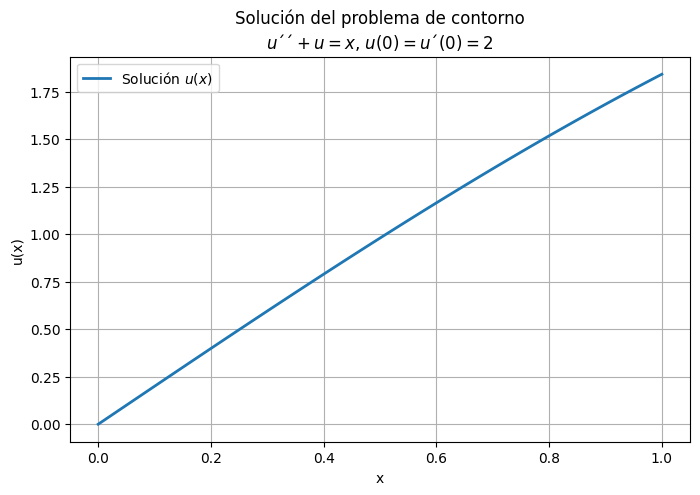

In [77]:
xx = np.linspace(0, 1, 100)
yy = u_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title('Solución del problema de contorno\n$u´´ + u = x$, $u(0)=u´(0)=2$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

La solución numérica:

In [78]:
# Coeficientes inciales dados por las condiciones iniciales
alpha_0 = 0
alpha_1 = 2

Proponemos la función de prueba:

In [79]:
u_n = alpha_0 + alpha_1 * x + a * x**2 + b * x**3
u_n

a*x**2 + b*x**3 + 2*x

Definimos el residuo (o error):

In [80]:
u_n_2 = sp.diff(u_n, x, 2)  # Segunda derivada

#E(x)
E = u_n_2 + u_n - x

E

a*x**2 + b*x**3 + x + 2*(a + 3*b*x)

In [81]:
E.simplify()

a*x**2 + 2*a + b*x**3 + 6*b*x + x

In [82]:
points=[sp.Rational(1,2),sp.Rational(1)]
print('Puntos de colocación:' ,points)

Puntos de colocación: [1/2, 1]


In [83]:
eqs=[sp.Eq(E.subs(x,p),0) for p in points]

# Resolver para a y b
sol_1=sp.solve(eqs,[a,b])

In [84]:
a_val = sol_1[a]
b_val = sol_1[b]

In [85]:
print(f" a2={a_val}, a3={b_val}")

 a2=-1/17, a3=-2/17


Sistema de ecuaciones simbólico:

In [86]:
for eq in eqs:
 sp.pprint(eq)

9⋅a   25⋅b   1    
─── + ──── + ─ = 0
 4     8     2    
3⋅a + 7⋅b + 1 = 0


Graficamos la solución analítica y la numérica:

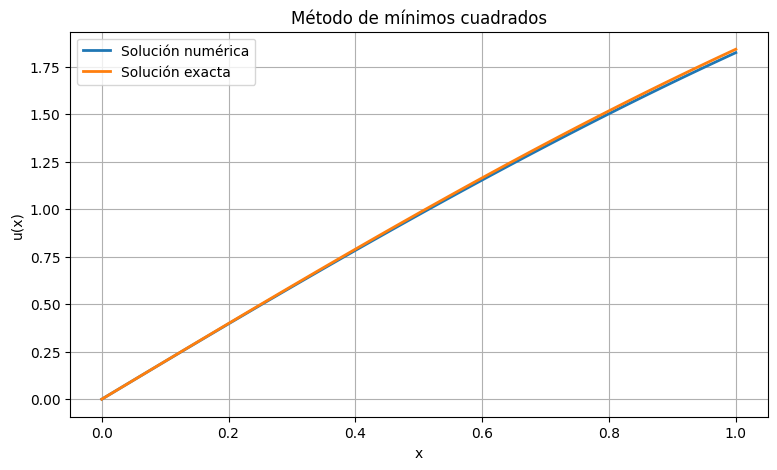

In [87]:
xx = np.linspace(0, 1, 100)

u_aprox_expr = u_n.subs({a: a_val, b: b_val})  # Solución aproximada
u_aprox_num = sp.lambdify(x, u_aprox_expr, 'numpy')  # Convertir a función numérica

plt.figure(figsize=(9, 5))
plt.plot(xx, u_aprox_num(xx), label="Solución numérica", linewidth=2)
plt.plot(xx, yy, label="Solución exacta", linewidth=2)

plt.title("Método de mínimos cuadrados")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

Graficando el error absoluto de la aproximación numérica:

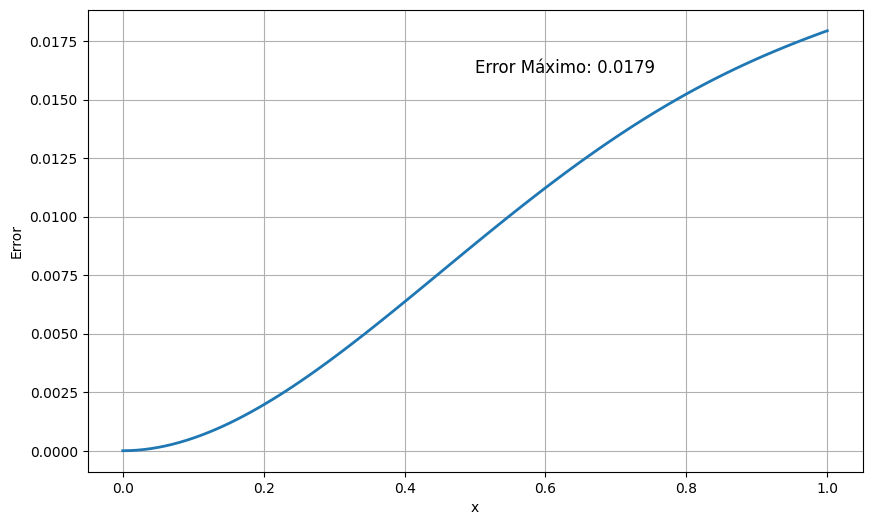

In [88]:
u_aprox_expr = u_n.subs({a: a_val, b: b_val})

error_expr = sp.Abs(u_expr - u_aprox_expr)  # Error

error_num = sp.lambdify(x, error_expr, 'numpy')  # Convertir el error a función numérica

xx = np.linspace(0, 1, 100)
yy_error = error_num(xx)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy_error, linewidth=2)
plt.xlabel('x')
plt.ylabel('Error')
plt.grid(True)
#Error máximo
error_max = np.max(yy_error)
plt.annotate(f'Error Máximo: {error_max:.4f}',
             xy=(0.5, error_max * 0.9),
             xytext=(0.5, error_max * 0.9),
             fontsize=12)
plt.show()